2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.3202 - loss: 2.6821 - val_accuracy: 0.3931 - val_loss: 2.1370
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.4959 - loss: 1.9312 - val_accuracy: 0.4430 - val_loss: 2.1785
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.5821 - loss: 1.6346 - val_accuracy: 0.4871 - val_loss: 1.9257
71/71 - 1s - 15ms/step - accuracy: 0.4871 - loss: 1.9257

Test accuracy: 0.487088143825531


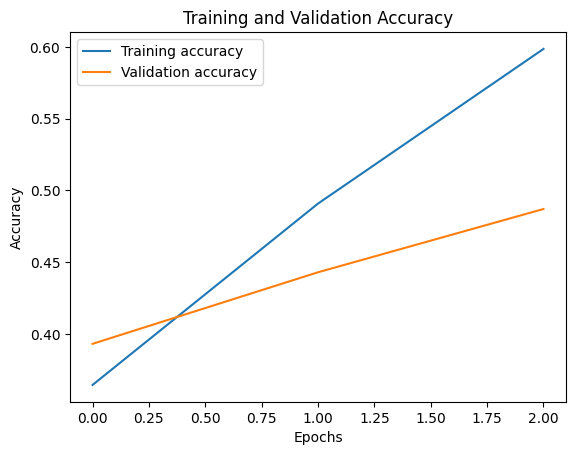

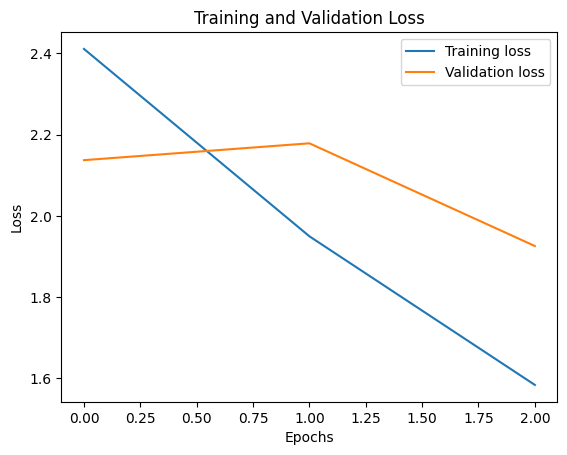

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 150

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.SimpleRNN(128, activation='tanh'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# validation accuracy/loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

